In [37]:
import pandas as pd
import numpy as np
import os
import gc
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = r'C:\Documents\Career Foundry\Python\Instacart Basket Analysis'

In [3]:
dfm = pd.read_pickle(os.path.join(path, '02 Data', 'Prepped Data', 'dfmWithOutLowActivityCustomers'))

In [4]:
dfm.shape

(30962785, 34)

In [5]:
dfm.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Surname,Gender,State,Age,date_joined,dependants,fam_status,income,region,exclusion_flag
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN


In [6]:
dfm.loc[dfm['prices'] > 15, 'price_range_loc'] = 'High-range product'

In [7]:
dfm.loc[(dfm['prices'] <= 15) & (dfm['prices'] > 5), 'price_range_loc'] = 'Mid-range product'

In [8]:
dfm['price_range_loc'].value_counts(dropna = False)

Mid-range product     20889993
Low-range product      9674839
High-range product      397953
Name: price_range_loc, dtype: int64

In [14]:
pd.options.display.max_columns = None

In [15]:
pd.options.display.max_rows = None

In [11]:
dfm.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_price_mean,spending_flag,med_days_since,Order freq,First Name,Surname,Gender,State,Age,date_joined,dependants,fam_status,income,region,exclusion_flag
0,2539329,1,1,2,8,0.0,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN


In [12]:
# lower the amount of memory numeric columns use
def lm(dfm):

    fcols = dfm.select_dtypes('float').columns
    icols = dfm.select_dtypes('integer').columns

    dfm[fcols] = dfm[fcols].apply(pd.to_numeric, downcast='float')
    dfm[icols] = dfm[icols].apply(pd.to_numeric, downcast='integer')
    
    return dfm

In [13]:
result = lm(dfm)

In [14]:
result.dtypes

order_id                    int32
user_id                    object
order_number                 int8
orders_day_of_week           int8
order_hour_of_day            int8
days_since_prior_order    float32
product_id                  int32
add_to_cart_order           int16
reordered                    int8
product_name               object
aisle_id                    int16
department_id                int8
prices                    float32
price_range_loc            object
busiest_day                object
busiest_days               object
busiest_period_of_day      object
max_order                    int8
loyalty_flag               object
user_price_mean           float32
spending_flag              object
med_days_since            float32
Order freq                 object
First Name                 object
Surname                    object
Gender                     object
State                      object
Age                          int8
date_joined                object
dependants    

In [15]:
dfm = result

In [6]:
dfm.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,First Name,Surname,Gender,State,Age,date_joined,dependants,fam_status,income,region
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South


In [5]:
dfm.shape

(30962785, 33)

In [18]:
dftest = dfm

In [19]:
dftest.shape

(30962785, 34)

In [20]:
del dftest['exclusion_flag']

In [22]:
dftest.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_price_mean,spending_flag,med_days_since,Order freq,First Name,Surname,Gender,State,Age,date_joined,dependants,fam_status,income,region
0,2539329,1,1,2,8,0.0,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South


In [23]:
dfm = dftest

In [24]:
dfm.shape

(30962785, 33)

In [25]:
dfm.to_pickle(os.path.join(path, '02 Data', 'Prepped Data', 'dfm4.pkl'))

## 5. Create a profiling variable

Create 'has_children' variable

In [51]:
dfm.loc[dfm['dependants'] == 0, 'has_children'] = "not_parent"

In [52]:
dfm.loc[dfm['dependants'] > 0, 'has_children'] = "parent"

In [53]:
dfm['has_children'].value_counts(dropna = False)

parent        23223512
not_parent     7739273
Name: has_children, dtype: int64

Create 'parents' variable - 'not_parent', 'parent_no_baby', 'with baby'

In [4]:
dfm = pd.read_pickle(os.path.join(path, '02 Data', 'Prepped Data', 'dfm4.pkl'))

In [7]:
dfm.loc[dfm['dependants'] == 0, 'parent'] = "not_parent"

In [21]:
# 'no_baby' criteria -
# dependants > 0 
# no baby products

dfm.loc[(dfm['dependants'] > 0) & ((dfm['product_id'] != 2) | (dfm['product_id'] != 18)), 'parent'] = 'parent_no_baby'

In [22]:
# 'with_baby' criteria -
# dependants > 0 
#'product_id' = 2 (Baby's Vitamin D3, Kids Multivitaim, Primadophilus for Children) or 
# 18 (Diapers, Baby Wipes, Baby Food)

dfm.loc[(dfm['dependants'] > 0) & ((dfm['product_id'] == 2) | (dfm['product_id'] == 18)), 'parent'] = 'with_baby'

In [23]:
dfm['parent'].value_counts(dropna = False)

parent_no_baby    23223345
not_parent         7739273
with_baby              167
Name: parent, dtype: int64

In [16]:
dfm.head(100)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_price_mean,spending_flag,med_days_since,Order freq,First Name,Surname,Gender,State,Age,date_joined,dependants,fam_status,income,region,parent
0,2539329,1,1,2,8,0.0,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby
5,3367565,1,6,2,7,19.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby
6,550135,1,7,1,9,20.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby
7,3108588,1,8,1,14,14.0,196,2,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby
8,2295261,1,9,1,16,0.0,196,4,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby
9,2550362,1,10,4,8,30.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby


Create 'parent_spending_power' variable

In [38]:
# 'not parent'  criteria -
# dependants == 0

dfm.loc[dfm['dependants'] == 0, 'parent_spending_power'] = "not_parent"

In [39]:
# 'low_spending' criteria -
# dependants > 0
# income =< 40000


dfm.loc[(dfm['dependants'] > 0) & (dfm['income'] <= 40000), 'parent_spending_power'] = 'low_spending'

In [40]:
# 'high_spending' criteria -
# dependants > 0 
# income > 40000

dfm.loc[(dfm['dependants'] > 0) & (dfm['income'] > 40000), 'parent_spending_power'] = 'high_spending'

In [41]:
gc.collect()

90

In [42]:
dfm['parent_spending_power'].value_counts(dropna = False)

high_spending    22018838
not_parent        7739273
low_spending      1204674
Name: parent_spending_power, dtype: int64

In [33]:
dfm.head(100)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_price_mean,spending_flag,med_days_since,Order freq,First Name,Surname,Gender,State,Age,date_joined,dependants,fam_status,income,region,parent,parent_spending_power
0,2539329,1,1,2,8,0.0,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending
5,3367565,1,6,2,7,19.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending
6,550135,1,7,1,9,20.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending
7,3108588,1,8,1,14,14.0,196,2,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending
8,2295261,1,9,1,16,0.0,196,4,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending
9,2550362,1,10,4,8,30.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending


In [4]:
dfm.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,State,Age,date_joined,dependants,fam_status,income,region,parent,parent_spending_power,parent_age
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent


In [13]:
gc.collect()

45

Create 'parent_age' variable


In [44]:
# 'not parent' criteria -
# dependants == 0

dfm.loc[dfm['dependants'] == 0, 'parent_age'] = "not_parent"

In [45]:
# younger_parent criteria - 
# dependants > 0
# Age =< 30

dfm.loc[(dfm['dependants'] > 0) & (dfm['Age'] <= 30), 'parent_age'] = 'younger_parent'

In [46]:
# 'older_parent' criteria -
# dependants > 0
# Age > 30

dfm.loc[(dfm['dependants'] > 0) & (dfm['Age'] > 30), 'parent_age'] = 'older_parent'

In [50]:
dfm.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_price_mean,spending_flag,med_days_since,Order freq,First Name,Surname,Gender,State,Age,date_joined,dependants,fam_status,income,region,parent,parent_spending_power,parent_age
0,2539329,1,1,2,8,0.0,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent


In [5]:
dfm['parent_age'].value_counts(dropna = False)

older_parent      18492909
not_parent         7739273
younger_parent     4730603
Name: parent_age, dtype: int64

Create 'parent_income_profile' variable

In [6]:
# 'parent_high_spending_power_baby' criteria - 
    # 'parent' = 'with_baby' and 'parent_spending_power' = 'high_spending'

dfm.loc[(dfm['parent'] == 'with_baby') & (dfm['parent_spending_power'] > 'high_spending'), 'parent_income_profile'] = 'parent_high_spending_power_baby'

In [9]:
# 'parent_high_spending_power' criteria - 
    # 'parent' = 'parent_no_baby' and 'parent_spending_power' = 'high_spending'

dfm.loc[(dfm['parent'] == 'parent_no_baby') & (dfm['parent_spending_power'] > 'high_spending'), 'parent_income_profile'] = 'parent_high_spending_power'

In [10]:
# 'no_children_high_spending_power' criteria - 
     # dependants == 0 & 'parent_spending_power' = 'high_spending'

dfm.loc[(dfm['dependants'] == 0) & (dfm['parent_spending_power'] > 'high_spending'), 'parent_income_profile'] = 'no_children_high_spending_power'

In [11]:
dfm['parent_income_profile'].value_counts(dropna = False)

NaN                                22018838
no_children_high_spending_power     7739273
parent_high_spending_power          1204671
parent_high_spending_power_baby           3
Name: parent_income_profile, dtype: int64

Because this variable only targets certain profiles, the null values are expected when customers don't fit any of these profiles 

In [12]:
dfm.head(100)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Age,date_joined,dependants,fam_status,income,region,parent,parent_spending_power,parent_age,parent_income_profile
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent,NaN
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent,NaN
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent,NaN
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent,NaN
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,119314,420,5,3,19,16.0,196,2,1,Soda,...,26,10/17/2018,2,married,97248,West,parent_no_baby,high_spending,younger_parent,NaN
100,1665683,423,3,2,11,7.0,196,3,0,Soda,...,22,9/28/2019,0,single,47180,Midwest,not_parent,not_parent,not_parent,no_children_high_spending_power
101,3096825,423,19,2,11,7.0,196,2,1,Soda,...,22,9/28/2019,0,single,47180,Midwest,not_parent,not_parent,not_parent,no_children_high_spending_power
102,1548901,546,4,3,18,23.0,196,1,0,Soda,...,75,6/29/2018,1,married,107953,Midwest,parent_no_baby,high_spending,older_parent,NaN


In [17]:
dfm.to_pickle(os.path.join(path, '02 Data', 'Prepped Data', 'dfmProfile.pkl'))

In [75]:
gc.collect()

38614

## 6. Create visualization of customer profile

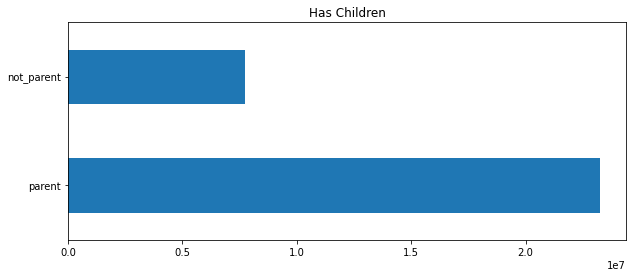

In [55]:
# Create bar chart using 'has_children' column

bar = dfm['has_children'].value_counts().plot(kind='barh', figsize=(10, 4), title='Has Children')

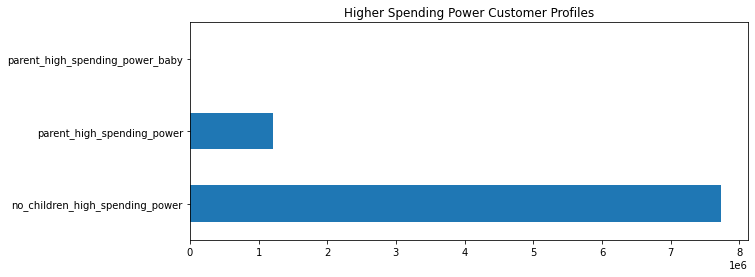

In [44]:
# Create bar chart using 'parent_income_profile' column

bar = dfm['parent_income_profile'].value_counts().plot(kind='barh', figsize=(10, 4), title='Higher Spending Power Customer Profiles')

## 7. Aggregate max, mean, min for customer profile level usage frequency & expenditure

In [54]:
dfm.head(100)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_price_mean,spending_flag,med_days_since,Order freq,First Name,Surname,Gender,State,Age,date_joined,dependants,fam_status,income,region,parent,parent_spending_power,parent_age,parent_income_profile,has_children
0,2539329,1,1,2,8,0.0,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent,NaN,parent
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent,NaN,parent
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent,NaN,parent
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent,NaN,parent
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent,NaN,parent
5,3367565,1,6,2,7,19.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent,NaN,parent
6,550135,1,7,1,9,20.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent,NaN,parent
7,3108588,1,8,1,14,14.0,196,2,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent,NaN,parent
8,2295261,1,9,1,16,0.0,196,4,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent,NaN,parent
9,2550362,1,10,4,8,30.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent,NaN,parent


In [57]:
# Aggregate people with and without children by how often they order

dfm.groupby('has_children').agg({'med_days_since':['max','min','mean']})

med_days_since                
                        max  min       mean
has_children                               
not_parent        28.972973  0.0  10.213575
parent            29.333334  0.0  10.235936

There is virtually no difference in ordering frequency between customers with and without children

In [58]:
# Aggregate people with and without children by how much they spend

dfm.groupby('has_children').agg({'user_price_mean':['max','min','mean']})

user_price_mean                
                         max  min       mean
has_children                                
not_parent      15006.940430  1.0  12.102987
parent          10209.987305  1.0  11.877516

There is virtually no difference in the amount spent between customers with and without children

In [50]:
# Aggregate people with high income profile by how often they order

dfm.groupby('parent_income_profile').agg({'med_days_since':['max','min','mean']})

med_days_since                      
                                           max        min       mean
parent_income_profile                                               
no_children_high_spending_power      28.972973   0.000000  10.213575
parent_high_spending_power           28.793104   0.500000  10.637590
parent_high_spending_power_baby      21.127907  15.610738  17.602243

Parents with higher income and no baby order less often than customers with higher income who have older children or no children no or older children

In [49]:
# Aggregate people with high income profile by how much they spend

dfm.groupby('parent_income_profile').agg({'user_price_mean':['max','min','mean']})

user_price_mean                    
                                            max      min       mean
parent_income_profile                                              
no_children_high_spending_power    15006.940430  1.00000  12.102987
parent_high_spending_power             7.091667  1.26250   6.504509
parent_high_spending_power_baby        6.870213  6.35906   6.657432

Customers with higher income who have no children spend more at Instacart than customers with higher income who have children

## 8. Compare customer profiles with regions and departments
## 9. Export charts to csv charts

In [62]:
# Compare regions with parents

comp_region_parent = pd.crosstab(dfm['region'], dfm['has_children'])

In [65]:
comp_region_parent

has_children,not_parent,parent
region,,
Midwest,1822703,5438423
Northeast,1354400,4109985
South,2581808,7728697
West,1980362,5946407


In [66]:
comp_region_parent.to_clipboard()

In [67]:
# Compare product departments with parents

comp_dept_parent = pd.crosstab(dfm['department_id'], dfm['has_children'])

In [68]:
comp_dept_parent

has_children,not_parent,parent
department_id,,
1,529348,1592383
2,8714,25697
3,281395,839433
4,2275440,6803832
5,36827,107800
6,64461,191530
7,645339,1926560
8,23602,69458
9,204296,617840


In [69]:
comp_dept_parent.to_clipboard()

In [70]:
# Compare regions with parent_income_profile

comp_region_parent_income_profile = pd.crosstab(dfm['region'], dfm['parent_income_profile'], dropna = True)

In [71]:
comp_region_parent_income_profile

parent_income_profile,no_children_high_spending_power,parent_high_spending_power,parent_high_spending_power_baby
region,,,
Midwest,1822703,281894,1
Northeast,1354400,212584,1
South,2581808,413324,1
West,1980362,296869,0


In [74]:
dfm['parent_income_profile'].value_counts()

no_children_high_spending_power    7739273
parent_high_spending_power         1204671
parent_high_spending_power_baby          3
Name: parent_income_profile, dtype: int64

In [76]:
comp_region_parent_income_profile.to_clipboard()

In [77]:
# Compare dept with parent_income_profile

comp_dept_parent_income_profile = pd.crosstab(dfm['department_id'], dfm['parent_income_profile'], dropna = True)

In [78]:
comp_dept_parent_income_profile

parent_income_profile,no_children_high_spending_power,parent_high_spending_power,parent_high_spending_power_baby
department_id,,,
1,529348,76360,0
2,8714,1446,0
3,281395,37680,0
4,2275440,283956,0
5,36827,6504,0
6,64461,7465,0
7,645339,144087,0
8,23602,3312,0
9,204296,21645,0


In [79]:
comp_dept_parent_income_profile.to_clipboard()

In [80]:
dfm.to_pickle(os.path.join(path, '02 Data', 'Prepped Data', 'dfmFinal.pkl'))